# Installation

In [ ]:
# run this cell to install pycaret in Google Colab
# !pip install pycaret

In [ ]:
# If you are using Jupyter notebook, you can pip install pycaret using jupyter notebook or command line
# pip install pycaret

In [5]:
from pycaret.utils import version
version()

1.0.0


# 1. Importing Dataset

In [6]:
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


# 2. Iteration 1: (without preprocessing)

In [7]:
from pycaret.regression import *
reg1 = setup(data, target = 'Price', session_id=786)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,786
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(6000, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 2.1. Compare Models

In [8]:
compare_models(blacklist = ['tr', 'catboost', 'ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,758.154000,2341349.734100,1504.969200,0.977100,0.081500,0.060700
1,Light Gradient Boosting Machine,761.549100,2891625.215800,1663.585200,0.971700,0.078600,0.057500
2,Random Forest,774.566900,2893301.832100,1656.459800,0.971500,0.081700,0.060000
3,Gradient Boosting Regressor,917.862600,3279440.137000,1781.347400,0.968600,0.100500,0.076600
4,Extreme Gradient Boosting,937.934200,3315438.229300,1794.928600,0.968500,0.104100,0.079100
5,Decision Tree,1006.442300,4687758.204000,2119.349700,0.954200,0.108700,0.078100
6,Ridge Regression,2506.939900,15049108.650200,3851.666000,0.857100,0.673400,0.294700
7,Lasso Regression,2506.121800,15123868.276000,3862.553300,0.855900,0.674900,0.294100
8,Lasso Least Angle Regression,2448.992300,15167299.893500,3865.115400,0.855900,0.661300,0.280100
9,Bayesian Ridge,2509.276800,15133663.010000,3863.814400,0.855900,0.674300,0.294700


## 2.2 Create Model

In [9]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2362.4238,1.123139e+07,3351.3268,0.8740,0.6076,0.3036
1,2411.6214,1.411782e+07,3757.3687,0.8561,0.6374,0.3063
2,2533.7810,1.506909e+07,3881.8924,0.8056,0.7226,0.3172
3,2614.7667,1.532827e+07,3915.1333,0.8512,0.7230,0.2986
4,2790.5429,2.231419e+07,4723.7894,0.8435,0.7523,0.3060
5,2541.1714,1.795225e+07,4237.0093,0.8588,0.6868,0.2750
6,2754.2667,1.922292e+07,4384.3950,0.8507,0.8454,0.3087
7,2300.3667,1.034753e+07,3216.7583,0.8810,0.5644,0.2801
8,2453.0762,1.502699e+07,3876.4658,0.8583,0.5913,0.2940
9,2428.9021,1.152102e+07,3394.2624,0.8685,0.6308,0.2749


# 2.3 Plot Model

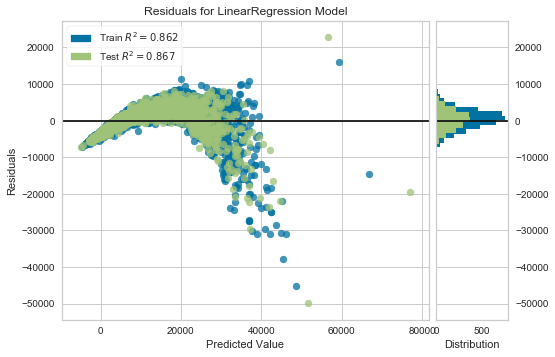

In [10]:
plot_model(lr)

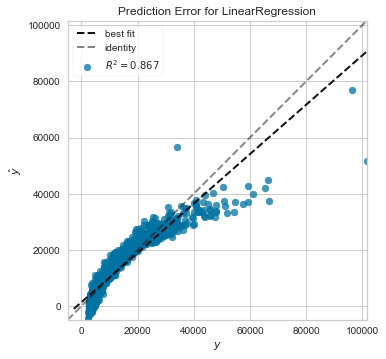

In [11]:
plot_model(lr, plot = 'error')

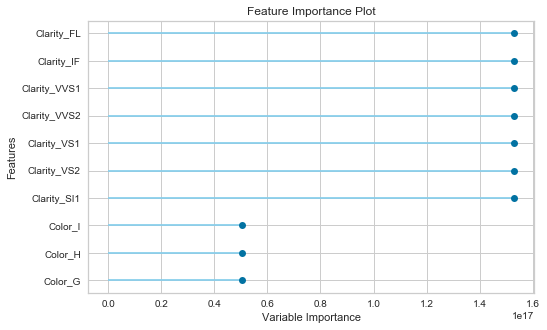

In [12]:
plot_model(lr, plot = 'feature')

# 3. Iteration 2: (with preprocessing)

In [13]:
# profile = True
data = get_data('diamond', profile = True)

In [14]:
reg2 = setup(data, target = 'Price', session_id=786,
             transform_target = True,
             bin_numeric_features=['Carat Weight'],
             remove_multicollinearity=True,
             feature_interaction=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,786
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(6000, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 3.1 Create Model

In [15]:
lr2 = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,914.4134,2.750378e+06,1658.4263,0.9691,0.1149,0.0858
1,1073.6728,5.579476e+06,2362.0913,0.9431,0.1125,0.0864
2,1035.1054,3.860228e+06,1964.7463,0.9502,0.1207,0.0920
3,1072.8651,4.025993e+06,2006.4878,0.9609,0.1133,0.0861
4,1008.3591,4.183873e+06,2045.4517,0.9707,0.1143,0.0873
5,1211.2022,6.037745e+06,2457.1824,0.9525,0.1261,0.0944
6,939.1500,5.064852e+06,2250.5226,0.9607,0.1064,0.0773
7,1066.9258,3.309285e+06,1819.1440,0.9619,0.1330,0.1017
8,1033.3353,4.757183e+06,2181.0967,0.9552,0.1157,0.0867
9,1003.1284,2.843500e+06,1686.2682,0.9675,0.1158,0.0871


## 3.2. Plot Model

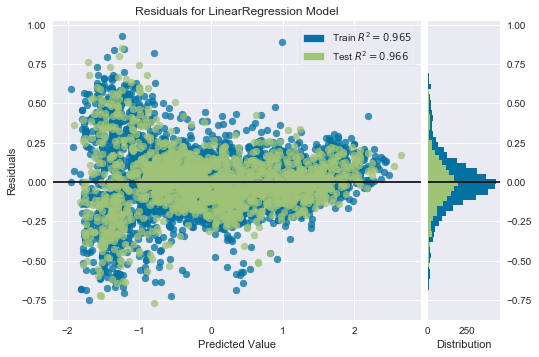

In [16]:
plot_model(lr2)

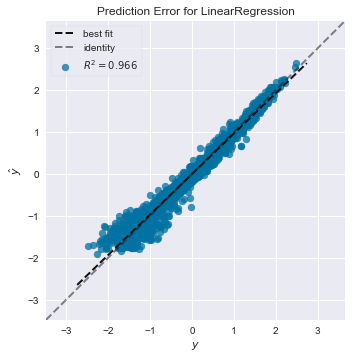

In [17]:
plot_model(lr2, plot = 'error')

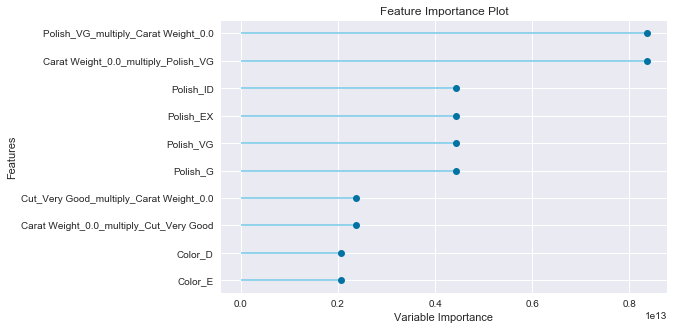

In [18]:
plot_model(lr2, plot = 'feature')

# 4. Finalize Model

In [19]:
holdout_pred = predict_model(lr2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,940.6114,3.455430e+06,1858.8788,0.9657,0.1099,0.0831


In [20]:
final_lr = finalize_model(lr2)

In [21]:
print(final_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


# 5. Save Model

In [22]:
save_model(final_lr, 'lr_mlops_demo')

Transformation Pipeline and Model Succesfully Saved


In [23]:
l = load_model('lr_mlops_demo')

Transformation Pipeline and Model Sucessfully Loaded


In [ ]:
lr_loaded = load_model('lr_mlops_demo')

In [ ]:
print(lr_loaded)

In [ ]:
predictions = predict_model(lr_loaded, data=data)
predictions.head()

# 6. Deploy Model

In [ ]:
deploy_model(final_lr, model_name = 'lr_mlops2020', platform = 'aws',
             authentication = {'bucket' : 'pycaret-test'})

# Learning Resources:

- PyCaret Regression Module : https://www.pycaret.org/regression
- Regression Tutorial (Level Beginner) : https://pycaret.org/reg101/
- Regression Tutorial (Level Intermediate) : https://pycaret.org/reg102/